In [2]:
from scipy import stats as scpst
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

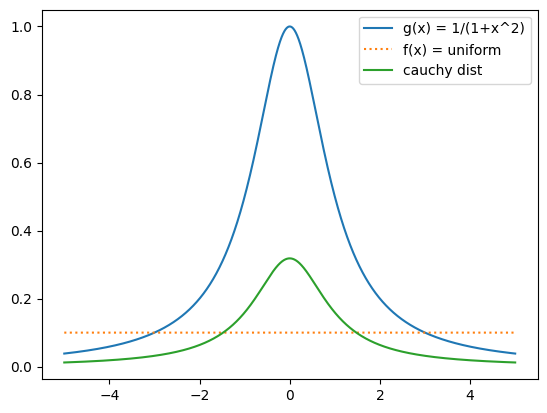

In [10]:
xgrid = np.linspace(-5, 5, 5000)
def function(x):
    return (1/(1+x**2))

plt.plot(xgrid, function(xgrid), label='g(x) = 1/(1+x^2)')
plt.plot(xgrid, xgrid*0.0 + 1.0/10, label='f(x) = uniform', ls=":")
plt.plot(xgrid, scpst.cauchy.pdf(xgrid, loc=0, scale=1), label="cauchy dist")
plt.legend()

sample mean: 2.7444 and sample std: 0.0876


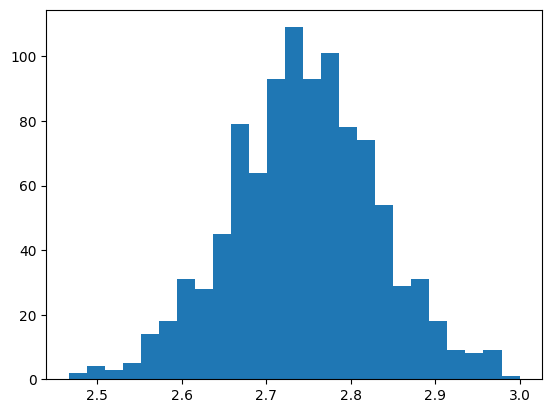

In [4]:
ntrials = 1000
nsmp = 1000
lower_bound= -5; upper_bound= 5

estens = np.zeros(ntrials)
dist = scpst.uniform(loc = lower_bound, scale = np.abs(lower_bound)+np.abs(upper_bound))
for ii in range(ntrials):
    estens[ii] = (upper_bound- lower_bound)*np.average(function(dist.rvs(size = nsmp)))
    
hst = plt.hist(estens, 25)
sample_mean= np.mean(estens); sample_std= np.std(estens)
print(f"sample mean: {sample_mean:.4f} and sample std: {sample_std:.4f}")
plt.show()

sample mean: 2.7504 and sample std: 0.1162


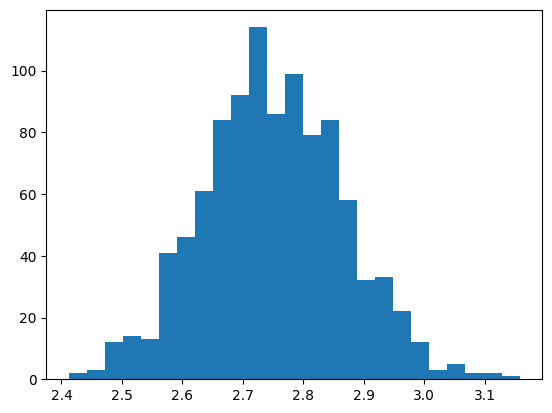

In [5]:
estensis1 = np.zeros(ntrials)
isdist1 = scpst.cauchy(loc = 0, scale = 1.0)

for ii in range(ntrials):
    smp = isdist1.rvs(size = nsmp)
    estensis1[ii] = (upper_bound- lower_bound)*np.average(function(smp), weights = dist.pdf(smp) / isdist1.pdf(smp))
    
hst1 = plt.hist(estensis1, 25)
sample_mean= np.mean(estensis1); sample_std= np.std(estensis1)
print(f"sample mean: {sample_mean:.4f} and sample std: {sample_std:.4f}")

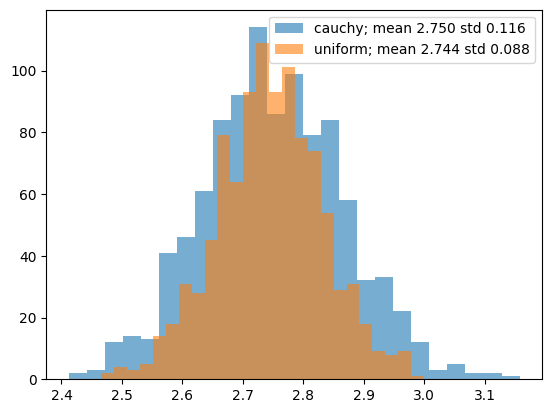

In [9]:
sample_mean= np.mean(estensis1); sample_std= np.std(estensis1)
hst1 = plt.hist(estensis1, 25, label=f"cauchy; mean {sample_mean:.3f} std {sample_std:.3f}", alpha = 0.6)

sample_mean= np.mean(estens); sample_std= np.std(estens)
hst = plt.hist(estens, 25, label=f"uniform; mean {sample_mean:.3f} std {sample_std:.3f}", alpha = 0.6)

plt.legend()

Cauchy has higher standard dev than uniform but has similar mean